In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set(style="whitegrid")

# Load data
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
# 1. Convert 'date_added' to datetime (ignore errors)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 2. Extract duration number and unit (like "90 min", "2 Seasons", etc.)
df[['duration_int', 'duration_unit']] = df['duration'].fillna("").str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

# 3. Fill missing values in important columns
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# 4. Display cleaned data
df[['type', 'title', 'duration', 'duration_int', 'duration_unit']].head()


,type,title,duration,duration_int,duration_unit
0,Movie,Dick Johnson Is Dead,90 min,90.0,min
1,TV Show,Blood & Water,2 Seasons,2.0,Seasons
2,TV Show,Ganglands,1 Season,1.0,Season
3,TV Show,Jailbirds New Orleans,1 Season,1.0,Season
4,TV Show,Kota Factory,2 Seasons,2.0,Seasons


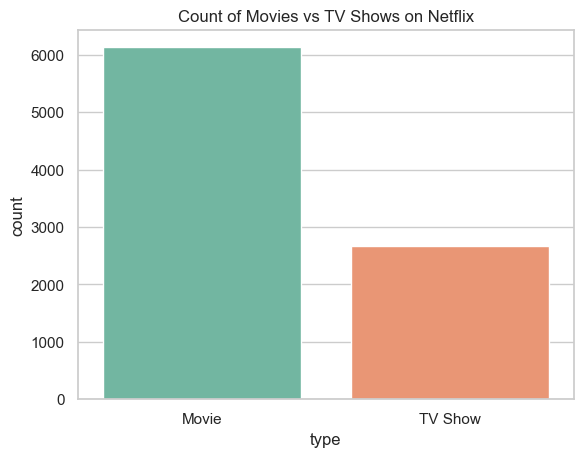

In [15]:
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()


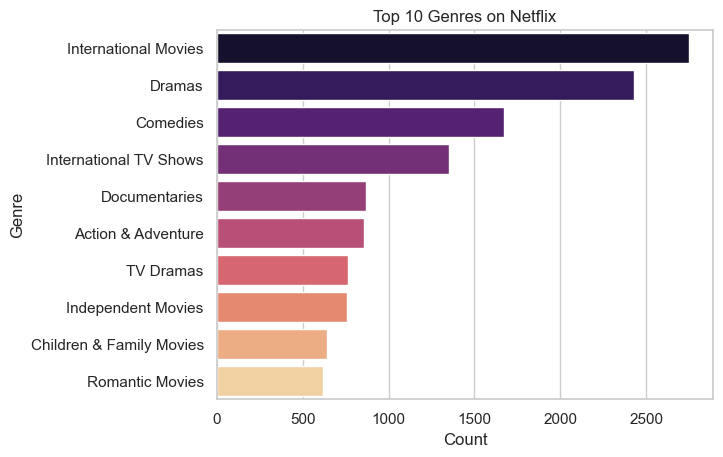

In [17]:
sns.barplot(data=top_genres, y='Genre', x='Count', hue='Genre', palette='magma', legend=False)
plt.title("Top 10 Genres on Netflix")
plt.show()


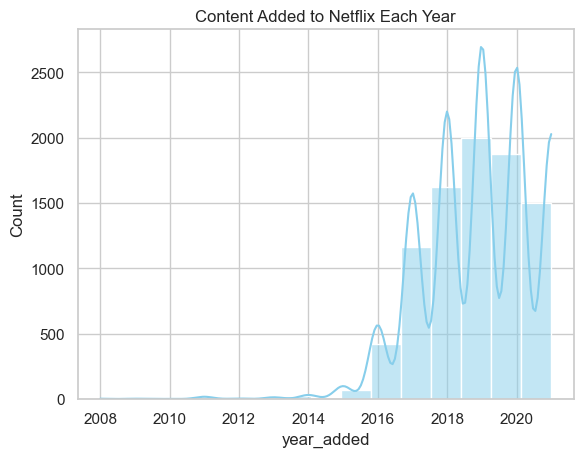

In [18]:
df['year_added'] = df['date_added'].dt.year
sns.histplot(data=df, x='year_added', bins=15, kde=True, color='skyblue')
plt.title("Content Added to Netflix Each Year")
plt.show()

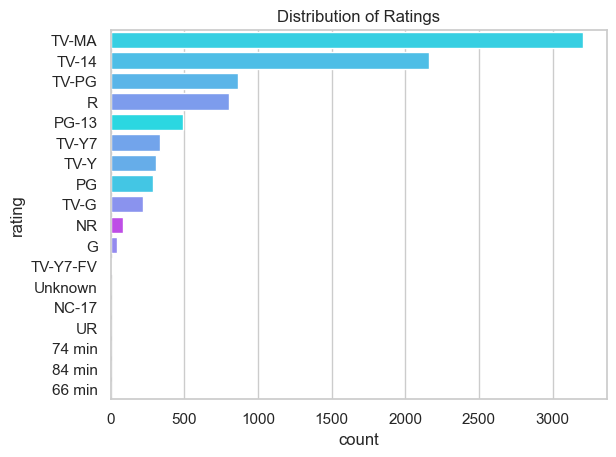

In [20]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, hue='rating', palette='cool', legend=False)
plt.title("Distribution of Ratings")
plt.show()


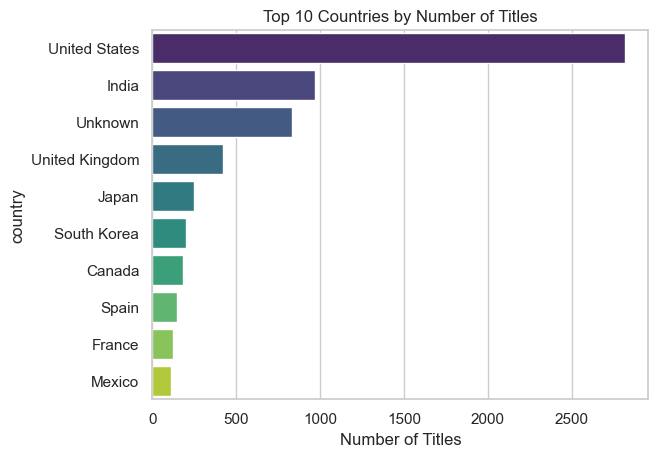

In [22]:
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis', legend=False)
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.show()


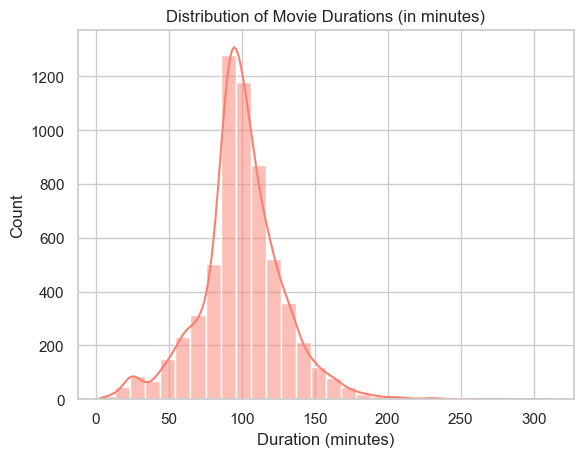

In [23]:
movie_df = df[df['type'] == 'Movie']
sns.histplot(movie_df['duration_int'].dropna(), bins=30, kde=True, color='salmon')
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.show()

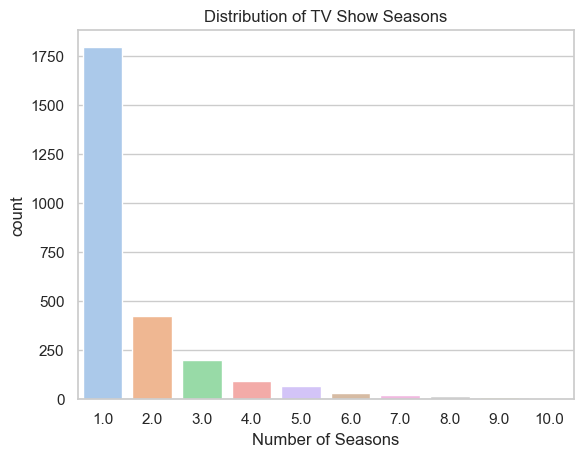

In [25]:
sns.countplot(
    data=tv_df,
    x='duration_int',
    order=tv_df['duration_int'].value_counts().head(10).index,
    hue='duration_int',
    palette='pastel',
    legend=False
)
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.show()


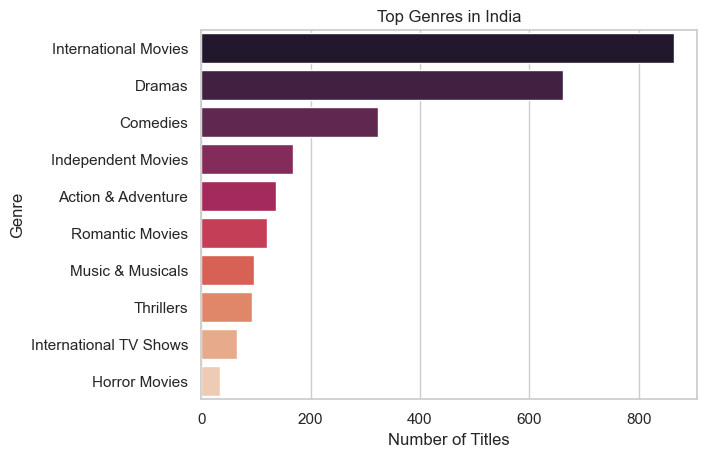

In [27]:
sns.barplot(
    data=top_india_genres,
    y='Genre',
    x='Count',
    hue='Genre',
    palette='rocket',
    legend=False
)
plt.title("Top Genres in India")
plt.xlabel("Number of Titles")
plt.show()
